**Data Submission - 16 May 2021**

Nama : Rahmat Alfazri

E-mail : rahmadalfazr@gmail.com

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile,os
from sklearn.model_selection import train_test_split

In [ ]:
print(tf.__version__)

2.4.1


In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-05-16 13:39:18--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M   747KB/s    in 5m 23s  

2021-05-16 13:44:42 (975 KB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# File rockpaperscissord di ekstrak
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
# Membuat Train directory dan validation directory yang akan digunakan
base_dir = '/tmp/rockpaperscissors'
train_dir_data = os.path.join(base_dir, 'train')
os.mkdir(train_dir_data)
validation_dir_data = os.path.join(base_dir, 'val')
os.mkdir(validation_dir_data)

In [ ]:
# Melihat list isi dari direktori
os.listdir('/tmp/rockpaperscissors/')

['val',
 'README_rpc-cv-images.txt',
 'train',
 'scissors',
 'paper',
 'rock',
 'rps-cv-images']

In [ ]:
# Membuat train direktori
data_train_rock = os.path.join(train_dir_data, 'rock')
os.mkdir(data_train_rock)
data_train_paper = os.path.join(train_dir_data, 'paper')
os.mkdir(data_train_paper)
data_train_scissors = os.path.join(train_dir_data, 'scissors')
os.mkdir(data_train_scissors)

# Membuat validation direktori
data_val_rock = os.path.join(validation_dir_data, 'rock')
os.mkdir(data_val_rock)
data_val_paper = os.path.join(validation_dir_data, 'paper')
os.mkdir(data_val_paper)
data_val_scissors = os.path.join(validation_dir_data, 'scissors')
os.mkdir(data_val_scissors)

In [ ]:
# Membuat direktori per jenis_seharusnya sebelum list ini tuh
rocks_dir = os.path.join(base_dir, 'rock')
papers_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [ ]:
# Menjalankan split pada dataset train dan validation (dengan data validasi harus 40% dari total dataset)
data_train_rock_dir, data_val_rock_dir = train_test_split(os.listdir(rocks_dir), test_size = 0.4)
data_train_paper_dir, data_val_paper_dir = train_test_split(os.listdir(papers_dir), test_size = 0.4)
data_train_scissors_dir, to_val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.4)

In [ ]:
import shutil

#train
for data in data_train_rock_dir:
  shutil.copy(os.path.join(rocks_dir, data), os.path.join(data_train_rock, data))

for data in data_train_paper_dir:
  shutil.copy(os.path.join(papers_dir, data), os.path.join(data_train_paper, data))

for data in data_train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir, data), os.path.join(data_train_scissors, data))

#val
for data in data_val_rock_dir:
  shutil.copy(os.path.join(rocks_dir, data), os.path.join(data_val_rock, data))

for data in data_val_paper_dir:
  shutil.copy(os.path.join(papers_dir, data), os.path.join(data_val_paper, data))

for data in to_val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir, data), os.path.join(data_val_scissors, data))

In [ ]:
#mengenerate image data
train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

In [ ]:
#mentraining generate image data
train_generator = train_datagen.flow_from_directory(
        train_dir_data,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir_data,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
sequential_models = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation= 'relu', input_shape = (150,150,3)),
      tf.keras.layers.MaxPool2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation= 'relu'),
      tf.keras.layers.MaxPool2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation= 'relu'),
      tf.keras.layers.MaxPool2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(512,activation= 'relu'),
      tf.keras.layers.Dense(3, activation= 'softmax')
])

sequential_models.compile(
    loss= 'categorical_crossentropy',
    optimizer = tf.optimizers.Adam(),
    metrics = ['accuracy']
)

In [ ]:
#Melihat Summarynya
sequential_models.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

In [ ]:
sequential_models.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
#Membuat class optimize dengan menggunakan callback

class Optimize(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.97):
      print("\n ==== Akurasi sudah mencapai 0.97 ===")
      self.model.stop_training = True

callbacks = Optimize()

In [ ]:
history = sequential_models.fit (
    train_generator,
    steps_per_epoch = 41,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 27,
    verbose = 2,
    callbacks=[callbacks])

Epoch 1/20
41/41 - 65s - loss: 1.3361 - accuracy: 0.4223 - val_loss: 0.7781 - val_accuracy: 0.6759
Epoch 2/20
41/41 - 64s - loss: 0.6001 - accuracy: 0.7500 - val_loss: 0.3424 - val_accuracy: 0.8738
Epoch 3/20
41/41 - 63s - loss: 0.3022 - accuracy: 0.8887 - val_loss: 0.2807 - val_accuracy: 0.9132
Epoch 4/20
41/41 - 64s - loss: 0.2445 - accuracy: 0.9108 - val_loss: 0.2660 - val_accuracy: 0.8993
Epoch 5/20
41/41 - 64s - loss: 0.2411 - accuracy: 0.9131 - val_loss: 0.1749 - val_accuracy: 0.9491
Epoch 6/20
41/41 - 64s - loss: 0.1899 - accuracy: 0.9367 - val_loss: 0.1965 - val_accuracy: 0.9306
Epoch 7/20
41/41 - 63s - loss: 0.1826 - accuracy: 0.9337 - val_loss: 0.1648 - val_accuracy: 0.9410
Epoch 8/20
41/41 - 64s - loss: 0.1673 - accuracy: 0.9489 - val_loss: 0.1376 - val_accuracy: 0.9549
Epoch 9/20
41/41 - 64s - loss: 0.1460 - accuracy: 0.9535 - val_loss: 0.1225 - val_accuracy: 0.9583
Epoch 10/20
41/41 - 64s - loss: 0.1256 - accuracy: 0.9665 - val_loss: 0.1342 - val_accuracy: 0.9491
Epoch 11/

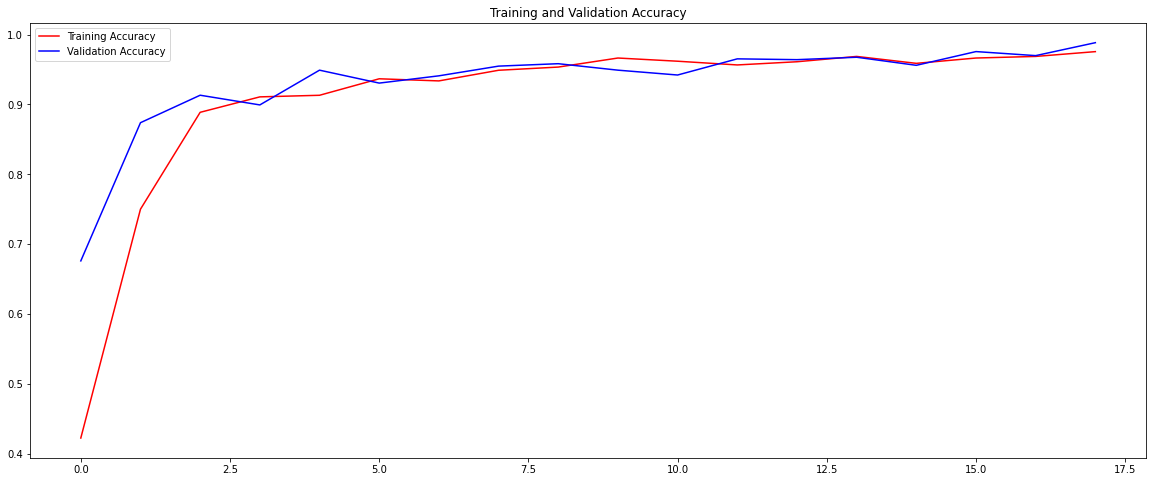

<Figure size 432x288 with 0 Axes>

In [ ]:
#Membuat visualisasi grafik

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))

fig, ax = plt.subplots(figsize=(20,8))
ax.plot(epochs, acc, 'r', label='Training Accuracy')
ax.plot(epochs, val_acc, 'b', label='Validation Accuracy')
ax.set_title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

Saving 3dI7E5pwR07mvKvF.png to 3dI7E5pwR07mvKvF.png
3dI7E5pwR07mvKvF.png
Gunting


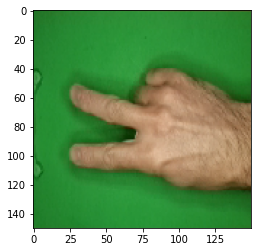

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = sequential_models.predict(images, batch_size=10)
  
  print(fn)
  if classes[0,0]==1:
    print('Kertas')
  elif classes[0,1]==1:
    print('Batu')
  else:
    print('Gunting')